<a href="https://colab.research.google.com/github/praveenkg14/deviousBandits/blob/master/Bandits_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# PKG - Bandits in TF Collab

import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import gym
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

In [0]:
print (os.getcwd())

/content


In [0]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0

    def pull(self):
        return np.random.randn() + self.m
    
    def update (self, x):
        # Running average of data
        self.N += 1
        self.mean = (1-1.0/self.N)*self.mean + 1.0/self.N*x




In [0]:
class BayesianBandit:
    def __init__ (self, m):
        self.true_mean = m
        self.predicted_mean = 0
        self.lamda_ = 1
        self.sum_x = 0
        self.tau = 1
        self.N = 0

    def pull (self):
        return np.random.randn() + self.true_mean

    def sample (self):
        return np.random.randn()/np.sqrt(self.lanbda_) + self.predicted_mean

    def update (self, x):
        self.lambda_ +=self.true_mean
        self.sum_x += x
        self.predicted_mean = (self.tau * self.sum_x)/self.lamda_


In [0]:
def run_experiment (m1, m2, m3, eps, N):

    # Create three bandits
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)

    for i in range(N):

        # Epsilon Greedy
        p = np.random.random()

        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        # Data for plot
        data[i] = x
    
    cummulative_average = np.cumsum(data) / (np.arange(N) + 1)
    for b in bandits:
        print (b.mean)

    return (cummulative_average)


0.7346753090907855
2.051376540373055
3.0229236971297326


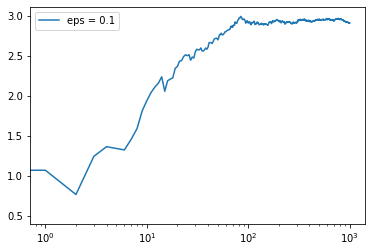

In [0]:
if __name__ == '__main__':
    c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 1000)

    plt.plot(c_1, label='eps = 0.1')
    plt.legend()
    plt.xscale('log')
    plt.show()
